# <h1 align="center">Classification Project</h1>
# <h1 align="center">Erfan Aliannezhadi</h1>

### Introduction
In this project, according to the medical information of the patients, which is fully described below, we predict whether a patient has a small chance of a heart attack or a high chance?

### Introduction of data set features
* **age**: Age of the patient
* **sex**: Sex of the patient
* **cp**: Type of chest pain
    * Value 1: direct heart pain
    * Value 2: Indirect pain that leads to feeling pain in the heart
    * Value 3: non-cardiac pain
    * Value 4: No symptoms
* **trtbps**: resting blood pressure
* **chol**: blood fats
* **fbs**: diabetes
* **restecg**: ECG results at rest
    * Zero value: normal
    * Value one: the ST segment of the ECG is abnormal
    * Value two: Probably or definitely the left ventricle is large
* **thalachh**: Maximum heart rate
* **exng**: Does the pain start with a specific activity?
* **output**: Chances of a heart attack


<p>First, we do the necessary imports</p>

In [180]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Then we study our dataset

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Since columns fbs and chol have a correlation of less than 0.1 with the response variable, we remove them
And also, since none of the remaining independent variables have a correlation higher than 0.8, we keep them.

In [5]:
df.drop('fbs', axis='columns', inplace=True)
df.drop('chol', axis='columns', inplace=True)
df

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


### Visualizing data

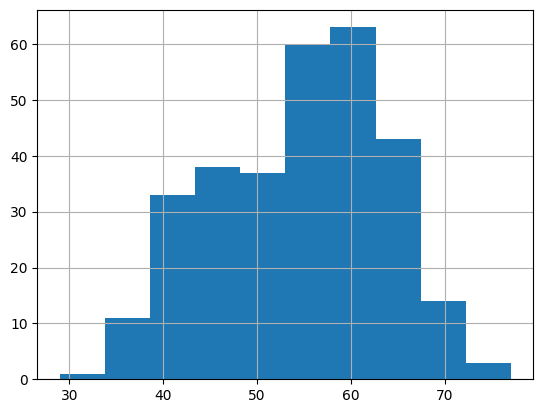

In [6]:
df['age'].hist()
plt.show()

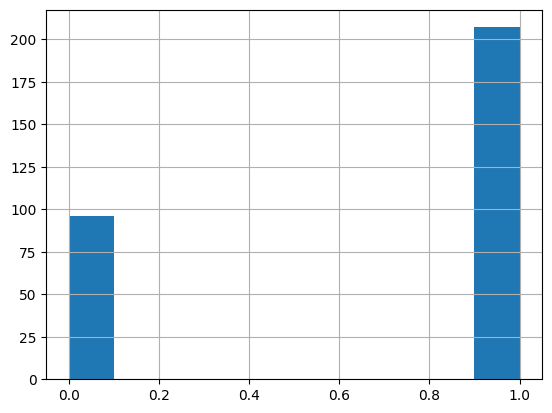

In [7]:
df['sex'].hist()
plt.show()

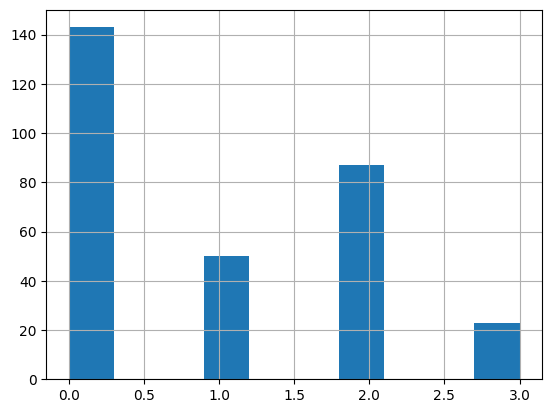

In [8]:
df['cp'].hist()
plt.show()

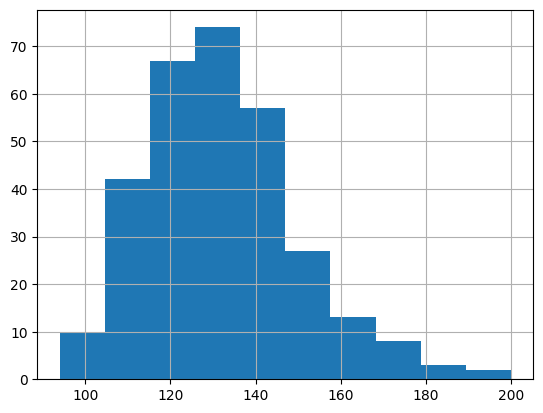

In [9]:
df['trtbps'].hist()
plt.show()

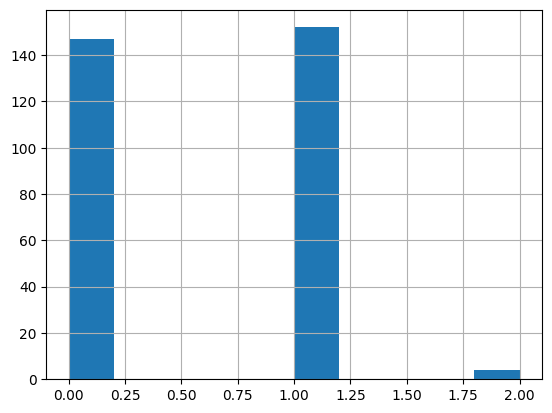

In [10]:
df['restecg'].hist()
plt.show()

then we remove rows with resteg 2

In [11]:
df = df[df['restecg'] != 2]

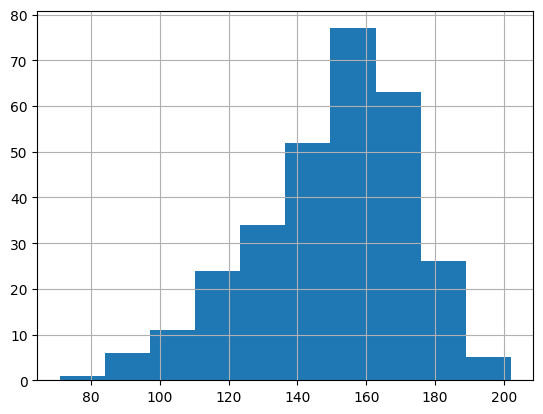

In [12]:
df['thalachh'].hist()
plt.show()

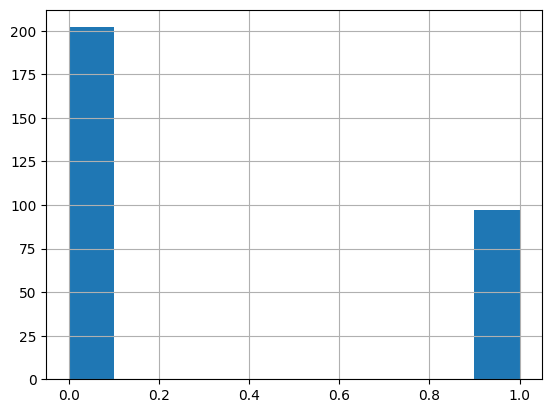

In [13]:
df['exng'].hist()
plt.show()

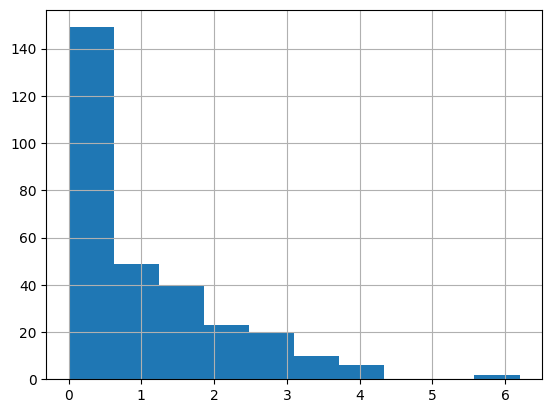

In [14]:
df['oldpeak'].hist()
plt.show()

so we remove the rows with oldpeak bigger than 4

In [15]:
df = df[df['oldpeak'] < 4]

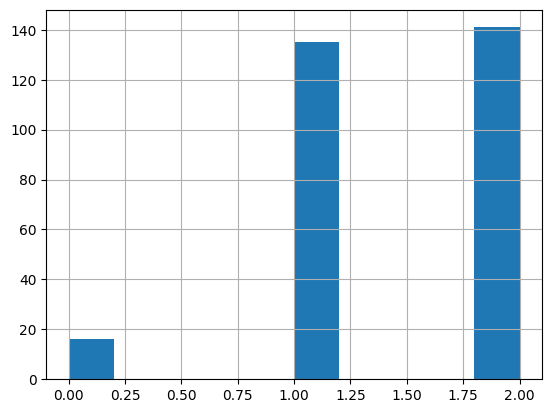

In [16]:
df['slp'].hist()
plt.show()

we remove rows with slp 0

In [17]:
df = df[df['slp'] != 0]

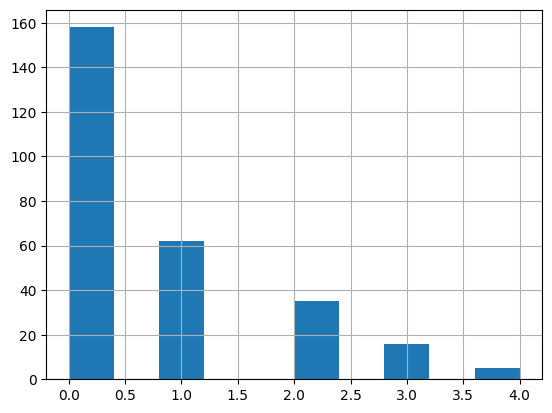

In [18]:
df['caa'].hist()
plt.show()

In [19]:
df = df[df['caa'] < 3]

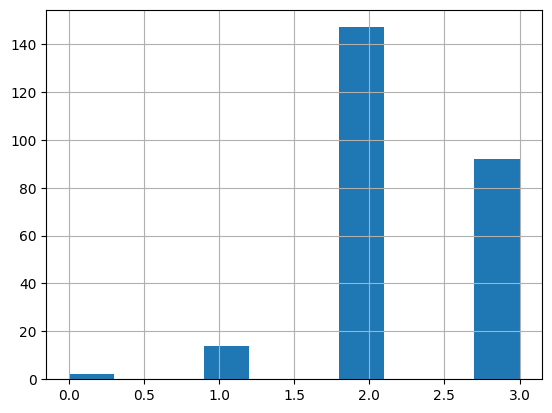

In [20]:
df['thall'].hist()
plt.show()

In [21]:
df = df[df['thall'] > 1]

In [22]:
df

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
6,56,0,1,140,0,153,0,1.3,1,0,2,1
7,44,1,1,120,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


Now we can see that our dataset is ready for training

In [23]:
X = df[['age', 'sex', 'cp', 'trtbps', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
X

array([[41.,  0.,  1., ...,  2.,  0.,  2.],
       [56.,  1.,  1., ...,  2.,  0.,  2.],
       [57.,  0.,  0., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [24]:
Y = df['output'].values
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-1.41402531, -1.37095517, -0.01224949, ...,  0.91567545,
        -0.70347663, -0.79110703],
       [ 0.24206118,  0.72941845, -0.01224949, ...,  0.91567545,
        -0.70347663, -0.79110703],
       [ 0.35246694, -1.37095517, -0.98812556, ...,  0.91567545,
        -0.70347663, -0.79110703],
       ...,
       [ 1.56693037,  0.72941845, -0.98812556, ..., -1.09208999,
         2.09870529,  1.26405146],
       [ 0.35246694,  0.72941845, -0.98812556, ..., -1.09208999,
         0.69761433,  1.26405146],
       [ 0.35246694, -1.37095517, -0.01224949, ..., -1.09208999,
         0.69761433, -0.79110703]])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

we define a function for plotting confusion matrix

In [152]:
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    classes = ["Output = 1", "Output = 0"]
    normalize = False,
    title = 'Confusion matrix'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### KNN

In [166]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n - 1] = accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.81, 0.85, 0.81, 0.88, 0.85, 0.85, 0.88, 0.83, 0.83])

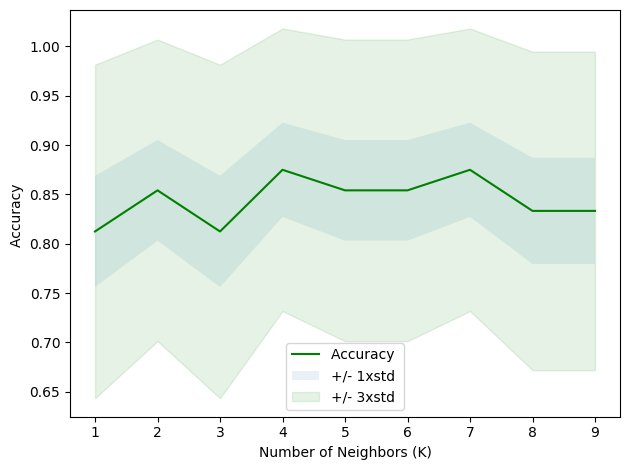

In [167]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [169]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)

The best accuracy was with 0.875 with k= 4


In [170]:
k = 4
neigh4 = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
yhat4 = neigh4.predict(x_test)
print("Train set Accuracy: ", accuracy_score(y_train, neigh4.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat4))
print(classification_report(y_test, yhat4))

Train set Accuracy:  0.8900523560209425
Test set Accuracy:  0.875
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.88      0.93      0.90        30

    accuracy                           0.88        48
   macro avg       0.88      0.86      0.86        48
weighted avg       0.88      0.88      0.87        48



so we have no overfitting

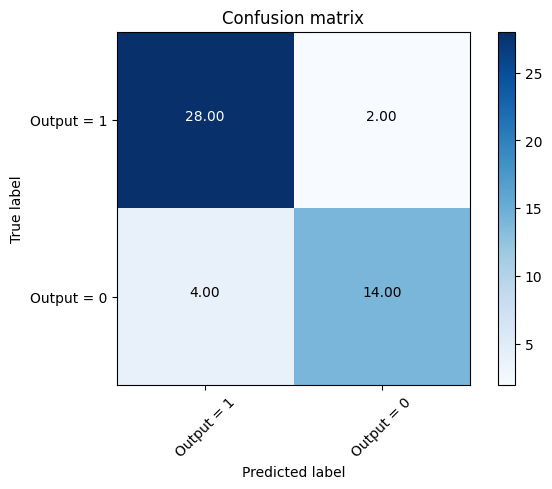

In [171]:
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix)

### Decision Tree

In [172]:
Ks = 11
accuracies = np.zeros((Ks - 1))

for n in range(3, Ks):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    Tree.fit(x_train, y_train)

    y_hat = Tree.predict(x_test)
    accuracies[n - 1] = accuracy_score(y_hat, y_test)

print("The best accuracy was with", accuracies.max(), "with k=", accuracies.argmax() + 1)

The best accuracy was with 0.8333333333333334 with k= 4


In [174]:
Tree4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
Tree4.fit(x_train, y_train)
y_hat_train = Tree4.predict(x_train)
y_hat_test = Tree4.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

Train set Accuracy:  0.8691099476439791
Test set Accuracy:  0.8541666666666666
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.81      1.00      0.90        30

    accuracy                           0.85        48
   macro avg       0.91      0.81      0.83        48
weighted avg       0.88      0.85      0.84        48



so we dont have any overfitting

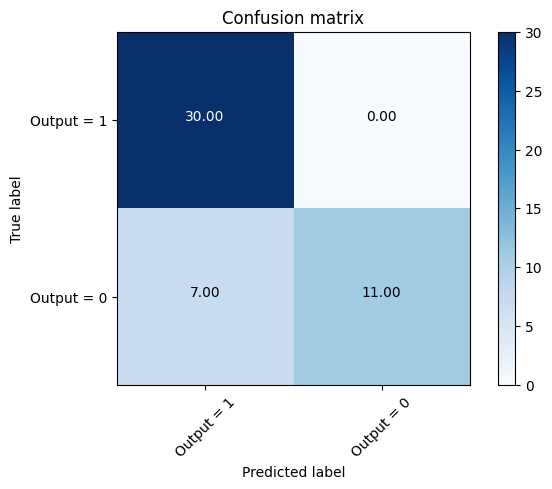

In [175]:
cnf_matrix = confusion_matrix(y_test, y_hat_test, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix)

### Logistic Regression

In [176]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
yhat = LR.predict(x_test)
yhat

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1])

In [177]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.82, 0.18],
       [0.51, 0.49],
       [0.43, 0.57],
       [0.45, 0.55],
       [0.59, 0.41],
       [0.74, 0.26],
       [0.31, 0.69],
       [0.22, 0.78],
       [0.74, 0.26],
       [0.8 , 0.2 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.79, 0.21],
       [0.37, 0.63],
       [0.55, 0.45],
       [0.49, 0.51],
       [0.3 , 0.7 ],
       [0.61, 0.39],
       [0.27, 0.73],
       [0.19, 0.81],
       [0.27, 0.73],
       [0.38, 0.62],
       [0.25, 0.75],
       [0.49, 0.51],
       [0.38, 0.62],
       [0.4 , 0.6 ],
       [0.55, 0.45],
       [0.72, 0.28],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.23, 0.77],
       [0.44, 0.56],
       [0.3 , 0.7 ],
       [0.3 , 0.7 ],
       [0.25, 0.75],
       [0.69, 0.31],
       [0.26, 0.74],
       [0.83, 0.17],
       [0.42, 0.58],
       [0.29, 0.71],
       [0.32, 0.68],
       [0.27, 0.73],
       [0.59, 0.41],
       [0.25, 0.75],
       [0.77, 0.23],
       [0.19, 0.81],
       [0.49, 0.51],
       [0.33,

In [178]:
y_hat_train = LR.predict(x_train)
y_hat_test = LR.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

Train set Accuracy:  0.8586387434554974
Test set Accuracy:  0.8125
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.82      0.90      0.86        30

    accuracy                           0.81        48
   macro avg       0.81      0.78      0.79        48
weighted avg       0.81      0.81      0.81        48



we have no overfitting

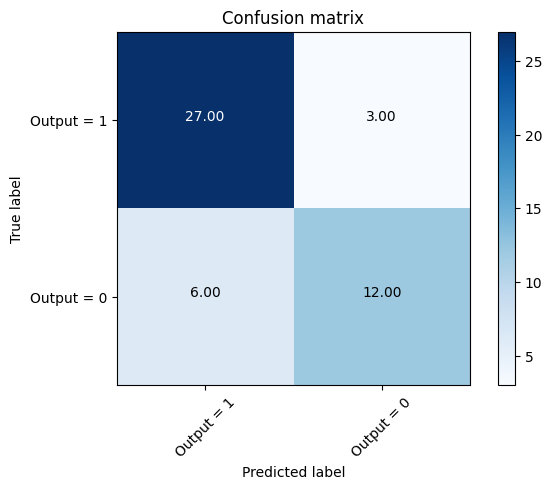

In [179]:
cnf_matrix = confusion_matrix(y_test, y_hat_test, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix)

### SVM

In [187]:
clf = svm.SVC(kernel='rbf', C=0.2)
clf.fit(x_train, y_train)

y_hat_train = clf.predict(x_train)
y_hat_test = clf.predict(x_test)

print("Train set Accuracy: ", accuracy_score(y_train, y_hat_train))
print("Test set Accuracy: ", accuracy_score(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

Train set Accuracy:  0.8795811518324608
Test set Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.81      0.97      0.88        30

    accuracy                           0.83        48
   macro avg       0.86      0.79      0.81        48
weighted avg       0.85      0.83      0.82        48



so we have no overfitting

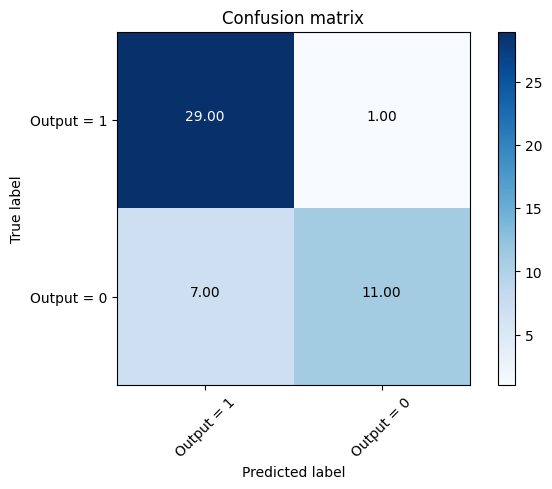

In [188]:
cnf_matrix = confusion_matrix(y_test, y_hat_test, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix)